<h1> Aux 2 - Pre procesamiento de datos </h1>

<h2> 1. Agrupaciones y uniones para formato de data plana </h2>

Generalmente con mayor volumen de data, esta se encuentra almacenada en:
- Bases de datos relacionales (MYSQL, POSTGRESQL)
- Datalakes (logs formato json en algún formato no estructurado)
- Formatos especificos de software 

Para hacer análisis de datos y obtener información de los datos es necesario (dentro del curso) tener un formato "plano" 
columnas -> variables
filas -> observaciones

Si tenemos datos que no están en este formato debemos unir, seleccionar y agregar según sea necesario para llegar a un formato plano.

<h2> 2. Eliminar errores, omisiones y campos que no aporten información </h2>

<h3> Cómo darse cuenta de este tipo de errores </h3>

Verificar que los datos utilizados sean representativos de la realidad que se quiere estudiar

<h3> Qué hacer una vez que tenemos identificado las falencias de los datos </h3>

- Eliminar variables
- Eliminar observaciones
- Imputar los datos faltantes o errados

<h2> 3.    Transformaciones de datos </h2>

-   Cómo la escala de los datos puede sesgar los métodos empleados
-   Hacer datos en distintas dimensiones comparables.

In [2]:
import pandas as pd

<h2> 1. Agrupaciones y uniones para formato de data plana </h2>

In [5]:
google_1 = 'https://raw.githubusercontent.com/saguerraty/Aux-IN6531-/master/Aux%202%20-%20preprocesamiento/datos/googleplaystore.csv'

google_2 = 'https://raw.githubusercontent.com/saguerraty/Aux-IN6531-/master/Aux%202%20-%20preprocesamiento/datos/googleplaystore_user_reviews.csv'

google_app = pd.read_csv(google_1)

reviews_list = pd.read_csv(google_2, chunksize= 10000)

In [10]:
reviews_list

In [7]:
google_reviews = pd.concat(reviews_list)

In [11]:
google_reviews.shape

(64295, 5)

In [12]:
google_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
google_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


<h4> Tipos de uniones </h4>
** En caso de hacer un JOIN a secas (la opcion default), normalmente considera un 'INNER JOIN'


<img src="https://estradawebgroup.com/ImagesUpload/sql-joins.jpg" alt="JOIN types">

In [24]:
merged_dfs = pd.merge(google_app, google_reviews, how='inner', on='App')

<h4> Version de union de las tablas usando SQL </h4>

<code>
SELECT app.*,

        review.*

    FROM google_app app 
    
        INNER JOIN google_reviews review ON app.App = review.App 
        

In [25]:
merged_dfs.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


<h2> 2. Eliminar errores, omisiones y campos que no aporten información </h2>

A. Identificar datos faltantes

In [26]:
merged_dfs.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,122622.000000,72615.000000,72615.000000
mean,4.322405,0.157320,0.494162
std,0.284766,0.332652,0.240144
min,2.500000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,4.900000,1.000000,1.000000


In [27]:
merged_dfs.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                   object
Type                       object
Price                      object
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [28]:
merged_dfs.isna().any(axis=0)

App                       False
Category                  False
Rating                     True
Reviews                   False
Size                      False
Installs                  False
Type                      False
Price                     False
Content Rating            False
Genres                    False
Last Updated              False
Current Ver               False
Android Ver               False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

In [29]:
merged_dfs.isna().sum()

App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

In [30]:
merged_dfs.isna().any(axis=1)

0         False
1         False
2         False
3          True
4         False
          ...  
122657     True
122658     True
122659    False
122660    False
122661    False
Length: 122662, dtype: bool

<h2> Eliminar o imputar datos faltantes o errados </h2>

In [ ]:
#eliminar todas las filas que tengan datos faltantes
merged_dfs.dropna(axis=0)

#para eliminar las columnas con datos faltantes usamos el eje de columnas de pandas
merged_dfs.dropna(axis=1)

#solo considerando datos faltantes en alguna de las variables
merged_dfs.dropna(axis=0, subset=['Rating'])

In [32]:
#probamos con eliminar los datos faltantes de raiting
merged_dfs.dropna(axis=0, subset=['Rating'])

#contamos la cantidad de datos faltantes luego de eliminar las app sin rating
merged_dfs.isna().any(axis=0)

App                       False
Category                  False
Rating                     True
Reviews                   False
Size                      False
Installs                  False
Type                      False
Price                     False
Content Rating            False
Genres                    False
Last Updated              False
Current Ver               False
Android Ver               False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

In [33]:
#ups, hicimos una edicion en el df sin guardarla
#en pandas el flagg inplace modifica el df sobre el que se aplica la funcion, tener cuidado con esto
merged_dfs.dropna(axis=0, subset=['Rating'], inplace=True)
merged_dfs.isna().any(axis=0)

App                       False
Category                  False
Rating                    False
Reviews                   False
Size                      False
Installs                  False
Type                      False
Price                     False
Content Rating            False
Genres                    False
Last Updated              False
Current Ver               False
Android Ver               False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

<h3>Que pasa si es que no queremos perder informacion con variables que tienen datos faltantes? </h3>

->  Entonces tenemos que imputar los datos de manera de mantener la informacion original de lo que estudiamos

In [ ]:
#reemplazar valores faltantes

#reemplazar por un valor fijo
merged_dfs['Rating'].fillna(value= 0, inplace=True )

#reemplazar por el ultimo valor valido anterior (fila sin NA anterior)
merged_dfs['Rating'].fillna(method='backfill')

#reemplazar segun el valor que toma la fila
merged_dfs[merged_dfs['Sentiment_Polarity'] <= -0.5] = -1

Imputar datos segun estadisticos descriptivos

In [ ]:
#segun la moda
mode = merged_dfs['Rating'].mode(dropna=True)

merged_dfs['Rating'].fillna(value= mode, inplace=True)

#segun promedio
mean = merged_dfs['Rating'].mean(skipna= True)

merged_dfs['Rating'].fillna(value= mean, inplace= True)

#segun percentil
percent_7 = merged_dfs['Rating'].quatile(q= 0.7)

merged_dfs['Rating'].fillna(value= percent_7, inplace=True)

#segun la mediana
median = merged_dfs['Rating'].median(skipna= True)

merged_dfs['Rating'].fillna(value= median, inplace=True)

<b>Inputar datos por algun valor fijo puede resultar en sesgar la data.</b>

Si la proporcion de datos faltantes es chica, puede que no cambie mucho el resultado de su problema.
Si estan intentando imputar una fraccion grande de los valores totales como datos imputados puede sesgar el resultado de su analisis

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

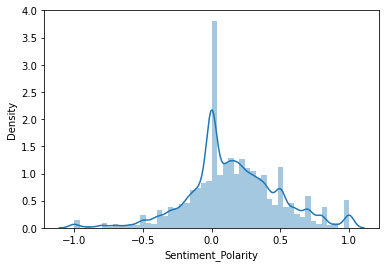

In [38]:
sns.distplot(merged_dfs['Sentiment_Polarity'].dropna())

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

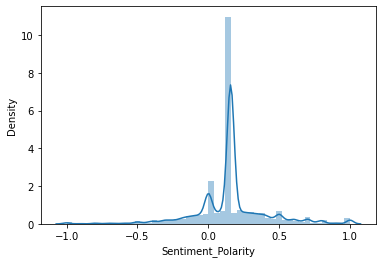

In [40]:
mean = merged_dfs['Sentiment_Polarity'].mean(skipna=True)

copy_df = merged_dfs.copy()

copy_df['Sentiment_Polarity'].fillna(mean, inplace=True)

sns.distplot(copy_df['Sentiment_Polarity'])

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

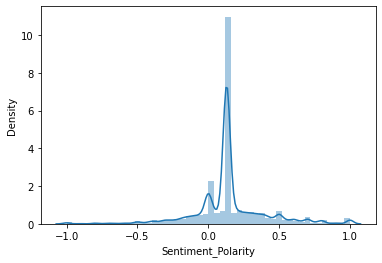

In [41]:
median = merged_dfs['Sentiment_Polarity'].median(skipna=True)

copy_df = merged_dfs.copy()

copy_df['Sentiment_Polarity'].fillna(median, inplace=True)

sns.distplot(copy_df['Sentiment_Polarity'])

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

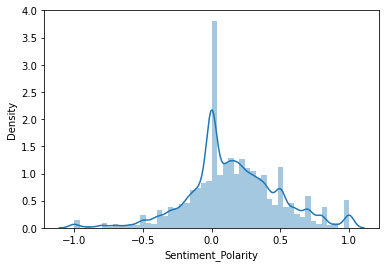

In [42]:
mode = merged_dfs['Sentiment_Polarity'].mode(dropna=True)

copy_df = merged_dfs.copy()

copy_df['Sentiment_Polarity'].fillna(mode, inplace=True)

sns.distplot(copy_df['Sentiment_Polarity'])

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

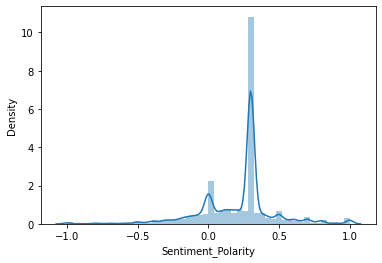

In [43]:
percent_7 = merged_dfs['Sentiment_Polarity'].quantile(q= 0.7)

copy_df = merged_dfs.copy()

copy_df['Sentiment_Polarity'].fillna(percent_7, inplace=True)

sns.distplot(copy_df['Sentiment_Polarity'])

Una forma de evitar sesgos tan fuertes es imputar los datos por un valor variable...

Una forma de hacer esto asumiendo que el error esta distribuido de manera aleatoria dentro del DF es copiando data existente

Copiando data valida anterior -> backfill

Copiando data valida posterior -> forward fill

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

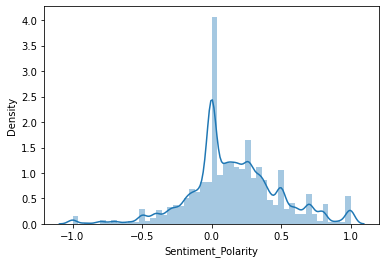

In [44]:
copy_df = merged_dfs.copy()

copy_df['Sentiment_Polarity'].fillna(method='backfill', inplace=True)

sns.distplot(copy_df['Sentiment_Polarity'])

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

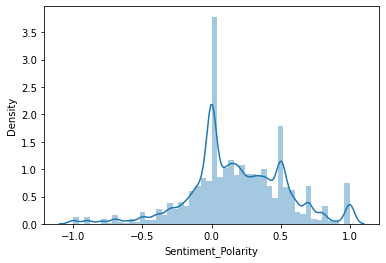

In [45]:
copy_df = merged_dfs.copy()

copy_df['Sentiment_Polarity'].fillna(method='ffill', inplace=True)

sns.distplot(copy_df['Sentiment_Polarity'])

<b>El problema con estos metodos es que no representan de manera fiel el comportamiento de una observacion con las otras caracteristicas de esa fila</b>

EJ: Si la fila anterior tenia una persona que media 1.40 mts y pesaba 52 kilos y me falta el peso de la fila siguente cuando se que alguien mide 2.02 mts es razonable decir que esa persona pesa 52Kg ?

Este error puede no ser un problema segun como se quiera usar la data, si solo quiero comparar distribuciones con un gran volumen no me va a afectar mucho la distribucion.

Si quiero agregar la data de manera muy resumida tampoco deberia afectar mucho los descriptivos

Si quiero entrenar un modelo puede que temine introduciendo error innecesario a mi modelo al no usar bien las tecnicas para imputar los datos

<h4> Imputar usando informacion que si conocemos </h4>
Una opcion para "adivinar" mejor esos datos faltantes es estimar que valor seria esperable con algun modelo predictivo

Para ese ejemplo usaremos una regresion lineal, pero para efectos practicos podriamos usar cualquier otro modelo que siga el tipo de prediccion que queremos con los datos que conocemos

In [17]:
import numpy as np

In [128]:
electric_data = 'https://raw.githubusercontent.com/saguerraty/Aux-IN6531-/master/Aux%202%20-%20preprocesamiento/datos/household_power_consumption_sample.csv'

electric = pd.read_csv(electric_data)

In [129]:
import random

In [130]:
nan_rows = random.randint(0, len(electric))

electric.loc[nan_rows,'Global_intensity'] = np.nan

In [131]:
electric.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,652365,13/3/2008,18:09:00,0.710,0.078,240.970,3.000,0.000,0.000,0.0
1,1122655,3/2/2009,08:19:00,2.150,0.062,240.060,8.800,0.000,0.000,17.0
2,424817,7/10/2007,17:41:00,0.344,0.048,236.970,1.400,0.000,0.000,0.0
3,1523962,9/11/2009,00:46:00,0.334,0.130,243.990,1.400,0.000,1.000,1.0
4,1109459,25/1/2009,04:23:00,1.304,0.070,246.430,5.200,0.000,0.000,0.0


In [132]:
electric.describe()

,Unnamed: 0,Sub_metering_3
count,2.075260e+05,204830.000000
mean,1.036704e+06,6.459606
std,5.991437e+05,8.437488
min,2.000000e+00,0.000000
25%,5.169310e+05,0.000000
50%,1.036468e+06,1.000000
75%,1.555952e+06,17.000000
max,2.075255e+06,31.000000


In [133]:
electric.isna().any(axis=0)

Unnamed: 0               False
Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity          True
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [134]:
electric.shape

(207526, 10)

In [97]:
electric.dtypes

Unnamed: 0                 int64
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [135]:
#reeemplazamos todos los valores no numericos
electric['Global_active_power'] = pd.to_numeric(electric['Global_active_power'], errors='coerce')
electric['Global_reactive_power'] = pd.to_numeric(electric['Global_reactive_power'], errors='coerce')
electric['Voltage'] = pd.to_numeric(electric['Voltage'], errors='coerce')
electric['Global_intensity'] = pd.to_numeric(electric['Global_intensity'], errors='coerce')
electric['Sub_metering_1'] = pd.to_numeric(electric['Sub_metering_1'], errors='coerce')
electric['Sub_metering_2'] = pd.to_numeric(electric['Sub_metering_2'], errors='coerce')
electric['Sub_metering_3'] = pd.to_numeric(electric['Sub_metering_3'], errors='coerce')

In [136]:
electric.dtypes

Unnamed: 0                 int64
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [137]:
electric.isna().any(axis=0)

Unnamed: 0               False
Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

In [138]:
electric.isna().sum(axis=0)

Unnamed: 0                  0
Date                        0
Time                        0
Global_active_power      2696
Global_reactive_power    2696
Voltage                  2696
Global_intensity         2697
Sub_metering_1           2696
Sub_metering_2           2696
Sub_metering_3           2696
dtype: int64

In [139]:
electric.dropna(subset=['Global_active_power', 'Sub_metering_1'], inplace=True)

electric.isna().sum(axis=0)

Unnamed: 0               0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         1
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [5]:
from sklearn.linear_model import LinearRegression

&lt;seaborn.axisgrid.FacetGrid at 0x7fe634d5de80&gt;

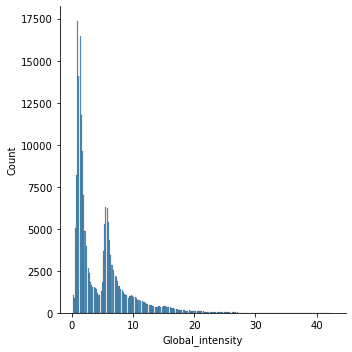

In [54]:
sns.displot(electric['Global_intensity'])

In [103]:
#imputamos los datos usando una regresion lineal creada con los datos que estan presentes
linreg = LinearRegression()

imput_df = electric.copy()
#eliminamos las columnas que no vamos a usar
imput_df.drop(columns=['Date', 'Time'], inplace=True)

#filtramos variables dependientes e independientes
x_vars = imput_df[imput_df['Global_intensity'].notnull()].drop(columns='Global_intensity')
y_var = imput_df[imput_df['Global_intensity'].notnull()]['Global_intensity']

#filtamos las filas con datos faltantes para luego poder predecir el valor faltante
x_test = imput_df[imput_df['Global_intensity'].isnull()].drop(columns='Global_intensity')


In [104]:
x_test

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
84949,1470694,0.16,0.0,243.78,0.0,0.0,1.0


In [105]:
linreg.fit(x_vars, y_var)

missing = linreg.predict(x_test)

In [118]:
imput_df.Global_intensity[imput_df['Global_intensity'].isnull()] = missing[0]

In [120]:
imput_df.isna().any()

Unnamed: 0               False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

In [121]:
from sklearn.impute import KNNImputer

In [140]:
knn_model = KNNImputer(missing_values=np.nan, n_neighbors=5)

numeric_electric = electric.drop(columns=['Date', 'Time'])

numeric_electric = pd.DataFrame(knn_model.fit_transform(numeric_electric), columns= numeric_electric.columns)

In [141]:
numeric_electric.isna().any()

Unnamed: 0               False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

In [151]:
electric['Global_intensity'] = [x for x in numeric_electric['Global_intensity']]

In [153]:
electric.isna().sum()

Unnamed: 0               0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<h2> Seleccion de atributos </h2>

In [55]:
print(electric.std())

Unnamed: 0               599143.653355
Global_active_power           1.057532
Global_reactive_power         0.112725
Voltage                       3.258327
Global_intensity              4.445545
Sub_metering_1                6.157961
Sub_metering_2                5.825760
Sub_metering_3                8.437488
dtype: float64


&lt;AxesSubplot:&gt;

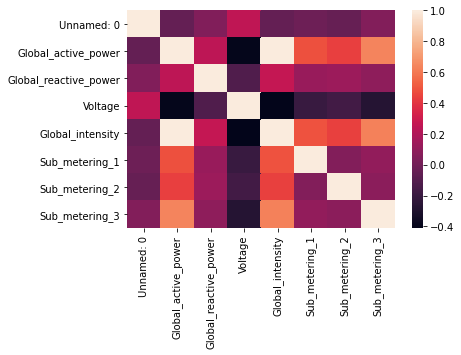

In [57]:
corr = electric.corr()

sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)

In [58]:
from scipy.stats import chi2_contingency

In [59]:
pd.crosstab(electric['Sub_metering_1'], electric['Global_intensity'])

Global_intensity,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,...,38.2,38.6,38.8,39.0,39.8,40.2,40.4,41.2,42.0,42.6
Sub_metering_1,,,,,,,,,,,,,,,,,,,,,
0.0,1076,863,5024,8196,17328,13972,16316,11580,9419,6833,...,0,1,0,0,0,0,0,0,0,0
1.0,0,0,0,14,25,104,125,143,183,158,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,2,9,18,18,26,41,19,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
p_value = chi2_contingency(pd.crosstab(electric['Sub_metering_1'], electric['Global_intensity']))[1]

if p_value < 0.05:
    print('p-valor = {}'.format(p_value))
    print('se rechaza la H0, por lo que se rechaza el supuesto de independencia de variables')
else:
    print('p-valor = {}'.format(p_value))
    print('no podemos rechazar el supuesto de independencia de variables')

p-valor = 0.0
se rechaza la H0, por lo que se rechaza el supuesto de independencia de variables


In [62]:
from scipy.stats import ks_2samp

has_3_submetering = electric[electric['Sub_metering_3'] != 0]
has_no_3_submetering = electric[electric['Sub_metering_3'] == 0]

p_value_ks = ks_2samp(has_3_submetering['Global_intensity'], has_no_3_submetering['Global_intensity'])[1]

if p_value_ks < 0.05:
    print('rechazamos la h0 donde la distribucion de ambas varibales es igual')

else: 
    print('no podemos rechazar que ambas variables estan descritas por la misma distribucion')

rechazamos la h0 donde la distribucion de ambas varibales es igual


In [81]:
from sklearn.metrics import r2_score

linreg = LinearRegression()

temp_df = electric.drop(columns=['Date', 'Time'])
temp_df.dropna(inplace=True)

x_train = temp_df.drop('Global_intensity', axis=1)
y_train =  temp_df['Global_intensity']

In [84]:
#normalmente uno haria esta parte como hicimos al imputar datos mediante regresion lineal separando el conjunto de testeo y el de entrenamiento
#predecir y r2
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_train)
r2 = r2_score(y_true= y_train, y_pred= y_pred)

print('R2 con todas las variables: {}'.format(r2))

#probamos ajustar un modelo donde no consideramos alguna variable
for i in x_train.columns:
    #ajustar modelo lineal

    print(' ')
    x_train_temp = x_train.drop(columns= str(i))

    print('Probamos sin la variable: '+ str(i))

    linreg.fit(x_train_temp, y_train)

    y_pred = linreg.predict(x_train_temp)
    r2_svariable = r2_score(y_train, y_pred)
    print('R2 con la variable faltante: {}'.format(r2_svariable))

    print(' ')


R2 con todas las variables: 0.9985344099815294
 
Probamos sin la variable: Unnamed: 0
R2 con la variable faltante: 0.9985336274838077
 
 
Probamos sin la variable: Global_active_power
R2 con la variable faltante: 0.8952537039768353
 
 
Probamos sin la variable: Global_reactive_power
R2 con la variable faltante: 0.9982346779267692
 
 
Probamos sin la variable: Voltage
R2 con la variable faltante: 0.9983810572572411
 
 
Probamos sin la variable: Sub_metering_1
R2 con la variable faltante: 0.9985216749095356
 
 
Probamos sin la variable: Sub_metering_2
R2 con la variable faltante: 0.9985211679205696
 
 
Probamos sin la variable: Sub_metering_3
R2 con la variable faltante: 0.9984430162992701
 
 
Probamos sin la variable: Global_intensity_log
R2 con la variable faltante: 0.9985324340898439
 


<h2> Transformacion de variables </h2>

In [65]:
from scipy import stats
from math import log

Transformacion logaritmica

In [67]:
electric['Global_intensity_log'] = electric['Global_intensity'].map(log)

&lt;seaborn.axisgrid.FacetGrid at 0x7fe6303dd940&gt;

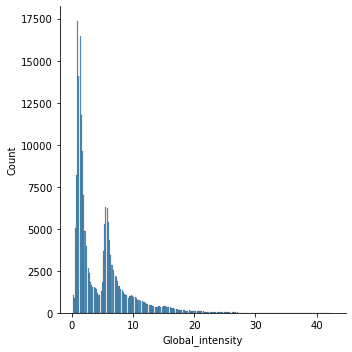

In [68]:
sns.displot(electric['Global_intensity'])

&lt;seaborn.axisgrid.FacetGrid at 0x7fe631111e50&gt;

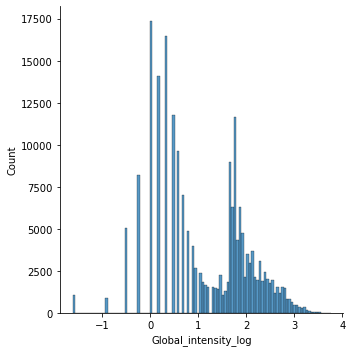

In [69]:
sns.displot(electric['Global_intensity_log'])

Transformacion Z-score

&lt;seaborn.axisgrid.FacetGrid at 0x7fe63494d520&gt;

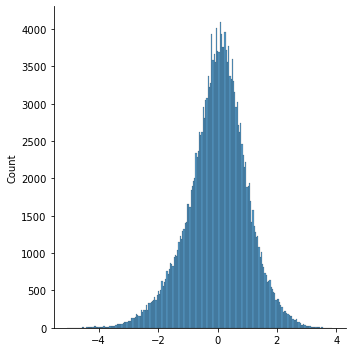

In [78]:
sns.displot(stats.zscore(electric['Voltage'].dropna()))

Transformacion Min Max


\begin{equation}
    X_{T} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}
\end{equation}

In [72]:
from sklearn.preprocessing import MinMaxScaler

&lt;AxesSubplot:ylabel=&#39;Density&#39;&gt;

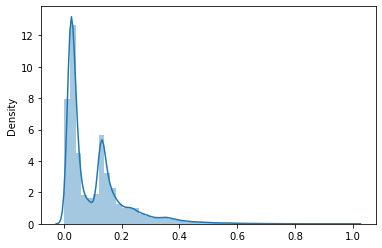

In [74]:
scaler = MinMaxScaler()

intensity = np.array(electric['Global_intensity'])
intensity = intensity.reshape(intensity.shape[0], -1)

sns.distplot(scaler.fit_transform(intensity))